In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
user_activity = pd.read_csv(r'C:\SEM5\tempWorkspace\apurvinho\resources\user_int.csv')

In [5]:
user_activity

,User,newTag,total
0,1,computernetworks,0.0
1,1,datascience,0.0
2,1,datastructuresalgorithms,24.0
3,1,html,0.0
4,1,java,22.0
5,1,javascript,0.0
6,1,operatingsystems,22.0
7,1,programming,12.0
8,1,python,12.0
9,3,java,22.0


In [9]:
def normalize(df):
    return df.subtract(df.mean(axis=1), axis=0)



In [6]:
mypt = user_activity.pivot_table(index='newTag', columns='User', values='total', fill_value=0)

In [10]:

normalized_df = normalize(mypt)

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_MATRIX = cosine_similarity(normalized_df)
similarity_df = pd.DataFrame(similarity_MATRIX, index=normalized_df.index, columns=normalized_df.index)

In [27]:
normalized_df

User,1,3,5
newTag,,,
computernetworks,-5.333333,-5.333333,10.666667
datascience,0.000000,0.000000,0.000000
datastructuresalgorithms,16.000000,-8.000000,-8.000000
html,-5.333333,-5.333333,10.666667
java,2.000000,2.000000,-4.000000
javascript,-5.333333,-5.333333,10.666667
operatingsystems,4.666667,-3.333333,-1.333333
programming,0.000000,-4.000000,4.000000
python,8.000000,-4.000000,-4.000000


In [35]:
def get_top_similar_users(userID, similarity_matrix, n=2):
    similar_users = similarity_matrix[userID].sort_values(ascending=False)
    return similar_users

In [38]:
similarity_matrix = cosine_similarity(normalized_df.T)
similarity_df = pd.DataFrame(similarity_matrix, index=mypt.columns, columns=mypt.columns)


In [46]:
def recommend_books(userID, pivot_df, similarity_df, top_n=3):
    similar_users = similarity_df[userID].sort_values(ascending=False).index[1:]
    tag_scores = pivot_df[similar_users].sum(axis=1).sort_values(ascending=False)
    recommend_tags = tag_scores.head(top_n).index.tolist()
    return recommend_tags

In [47]:
recommend_books(1, normalized_df, similarity_df)

['computernetworks', 'html', 'javascript']

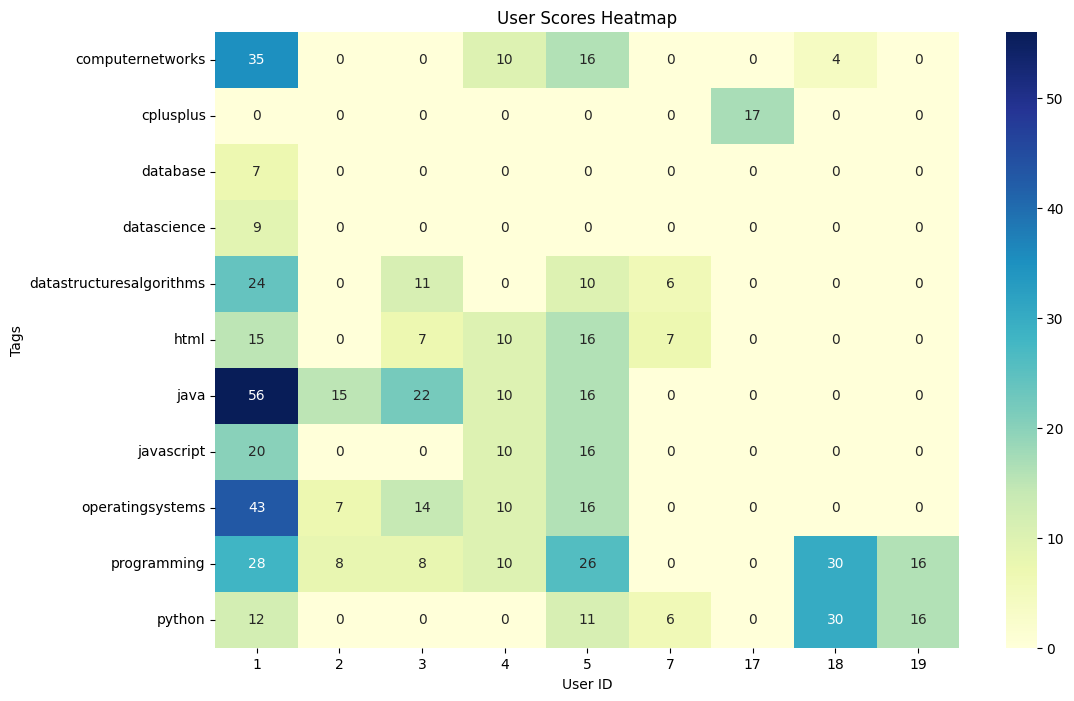

In [7]:
heatmap_data = user_activity.pivot_table(columns='User', index='newTag', values='total', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('User Scores Heatmap')
plt.xlabel('User ID')
plt.ylabel('Tags')
plt.show()

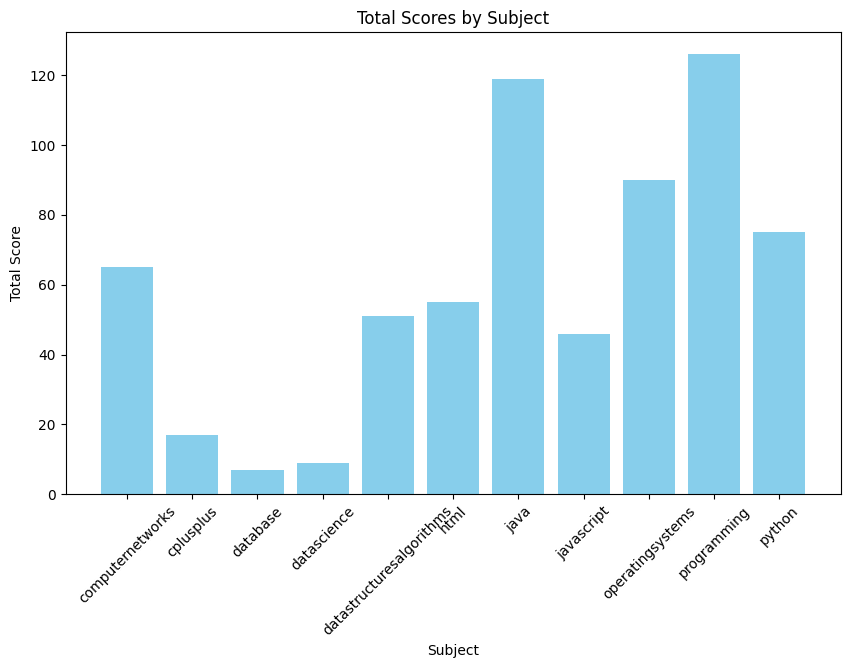

In [9]:
subject_scores = user_activity.groupby('newTag')['total'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(subject_scores['newTag'], subject_scores['total'], color='skyblue')
plt.title('Total Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Total Score')
plt.xticks(rotation=45)
plt.show()